Version 2: Updating the following sessions based on the feedback from the first submission

 1) Design and Test a Model Architecture:
     #Feedback: Please discuss why you would chose to Normalize the image and LabelBinarizer
     
     - Updates in Question 1
     
 2) Please compare the prediction accuracy of the result of the captured images with the validation set
 
     - Updates in question 7 and code block above it
     
  

# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
#importing section
import pickle
from PIL import Image
from IPython.core.display import display
import numpy as np
import csv
import collections
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow
import numpy as np
import cv2
import tensorflow as tf
import random
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
import os

In [2]:
# Load pickled data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(train['features'])

# TODO: number of testing examples
n_test = len(test['features'])

# TODO: what's the shape of an image?
image_shape = train['features'].shape

# TODO: how many classes are in the dataset
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (39209, 32, 32, 3)
Number of classes = 43


In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

###Show Image and label of image
def show_image(image_number, color):
    data = X_train[image_number]
    img = Image.fromarray(data, color)
    img.show()

def show_label(image_number):
    label = y_train[image_number]
    with open('signnames.csv', newline='') as csvfile:
        signnames = list(csv.reader(csvfile))
        print(signnames[label+1])
        
image_number = 3456
show_image(image_number, 'RGB')
show_label(image_number)

['2', 'Speed limit (50km/h)']


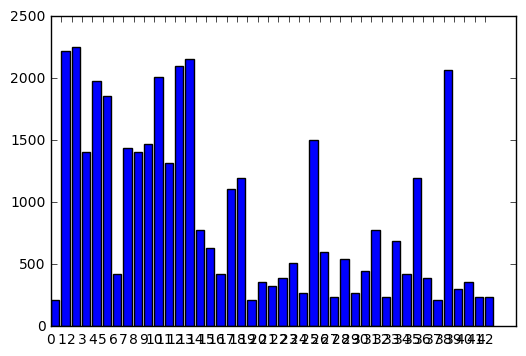

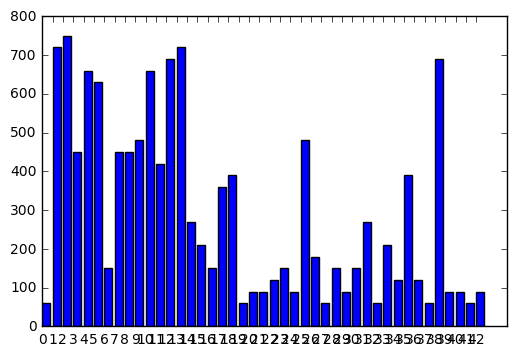

In [5]:
### Plotting Count of each sign:
def plot_sign_collection(signs):
    cnt = collections.Counter()
    for el in signs:
        cnt[el] += 1
    plt.bar(range(len(cnt)), cnt.values())
    plt.xticks(range(len(cnt)), cnt.keys())
    plt.show()
    
plot_sign_collection(y_train)
plot_sign_collection(y_test)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
### Normalize
def normalize_image(img):
    return (((img) - 128.) / 128.)

normalized_train = normalize_image(X_train)
normalized_test = normalize_image(X_test)


In [7]:
# Apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(y_train)
train_labels = encoder.transform(y_train)
test_labels = encoder.transform(y_test)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)
is_labels_encod = True

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

1) Normalized the image - The pixel value of the image ranges from 0-255. To normalize we subtract it by 128 and divide the result by 128.

2) LabelBinarizer - I used Scikit LabelBinarizer Algorithm to convert multiclass labels to one class.

3) Change to float32, so it can be multiplied against the features in TensorFlow, which are float32

## Adding for Resubmission

Normalization: 

- The reason I normalized the data:
    - Any rescaling of the input vector can be effictively undone by changing the corresponding Weights and Bias. This 
      would leave the exact same output as the input. 
    - Normalizing also helps make the training faster and reduces the chances of getting stuck in the laocal optima. 
    
Linear Binarizer: 

- I used linear Binarizer for One hot encoding. This transforms categorical features to a format that works better with classification and regression algorithms. 
- Linear Binarizer converted the Traffic sign labels into one hot encoded vectors in binary format. 
- One hot encoded labels are all array of zeros except starting index of the sign label. The label maps to the signnames.csv file for all 43 sign labels.


In [8]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

train_features, valid_features, train_labels, valid_labels = train_test_split(
    normalized_train,
    train_labels,
    test_size=0.05)

print(len(train_features))
print(len(train_labels))

37248
37248


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

1) I used sklearn.model_selection.train_test_split to create the Training and Validation data subsets.

2) Splitted the normalized train data and train labels by 5%. 

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Parameters
learning_rate = 0.05
batch_size = 100
training_epochs = 40

# Image Properties
image_width = 32
image_height = 32
color_channels = 3
n_classes = 43

layer_width = {
    'layer_1': 18,
    'layer_2': 36,
    'layer_3': 72,
    'fully_connected': 128
}

n_input = 4*4*layer_width['layer_3']

weights = {
    'layer_1': tf.Variable(tf.truncated_normal([3, 3, color_channels, layer_width['layer_1']], stddev=0.1)),
    'layer_2': tf.Variable(tf.truncated_normal([3, 3, layer_width['layer_1'], layer_width['layer_2']], stddev=0.1)),
    'layer_3': tf.Variable(tf.truncated_normal([3, 3, layer_width['layer_2'], layer_width['layer_3']], stddev=0.1)),
    'fully_connected': tf.Variable(tf.truncated_normal([n_input, layer_width['fully_connected']], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal([layer_width['fully_connected'], n_classes], stddev=0.1))
}
biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

In [10]:
### Convolutional layer with Relu

def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [11]:
### Maxpooling layer

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

In [12]:
keep_prob = tf.placeholder(tf.float32)


def conv_net(x, weights, biases):
    # Layer 1
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = maxpool2d(conv1, k=2)

    # Layer 2
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2, k=2)
    
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # Layer 3
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    conv3 = maxpool2d(conv3, k=2)

    # Fully connected layer
    
    fc1 = tf.reshape(
        conv3,
        [-1, weights['fully_connected'].get_shape().as_list()[0]])
    fc1 = tf.add(
        tf.matmul(fc1, weights['fully_connected']),
        biases['fully_connected'])
    fc1 = tf.nn.relu(fc1)
    
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Output Layer 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])

    return out

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

1) Type of Model:

- I have used the convolutional neural network model. 

2) Layers:

I have followed Aymeric Damien's Tensorflow model provided in the course and created my network as below:

- Layer 1 - Convolutional Network + Max Pool
- Layer 2 - Convolutional Network + Max Pool
- Layer 3 - Convolutional Network + Max Pool
- Layer 4 - Fully Connected

3) Sizes:

 - Layer 1 - Input (32x32x3 Image);  Output (16x16x18 Matrix)
 - Layer 2 - Input (16x16x18 Matrix); Output (8x8x36 Matrix)
 - Layer 3 - Input (8x8x36 Matrix); Output (4x4x72 Matrix)
 - Fully connected layer - 43x1 vector


In [13]:
### Train your model here.
### Feel free to use as many code cells as needed.

x = tf.placeholder("float", [None, image_width, image_height, color_channels])
y = tf.placeholder("float", [None, n_classes])

logits = conv_net(x, weights, biases)
   
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Initializing the variables
init = tf.initialize_all_variables()

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(len(train_features)/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x = train_features[(i*batch_size):((i+1)*batch_size)]
            batch_y = train_labels[(i*batch_size):((i+1)*batch_size)]
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        # Display logs per epoch step
        c = sess.run(cost, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
    print("Optimization Finished!")
    # Calculate accuracy
    print("Validation Accuracy:",accuracy.eval(feed_dict={x: valid_features, y: valid_labels, keep_prob: 1.0}))
    # Calculate accuracy using the test_set
    print("Test Accuracy:", accuracy.eval(feed_dict={x: normalized_test, y: test_labels, keep_prob: 1.0}))
    
    # Save the variables to disk.
    save_path = saver.save(sess, "model.ckpt")

    

Epoch: 0001 cost= 2.777469158
Epoch: 0002 cost= 1.862683058
Epoch: 0003 cost= 1.585834503
Epoch: 0004 cost= 1.349225521
Epoch: 0005 cost= 1.256196856
Epoch: 0006 cost= 1.109463334
Epoch: 0007 cost= 0.876807690
Epoch: 0008 cost= 0.814271152
Epoch: 0009 cost= 0.677148342
Epoch: 0010 cost= 0.530094147
Epoch: 0011 cost= 0.638149798
Epoch: 0012 cost= 0.454326242
Epoch: 0013 cost= 0.429443061
Epoch: 0014 cost= 0.517267942
Epoch: 0015 cost= 0.420959026
Epoch: 0016 cost= 0.312658191
Epoch: 0017 cost= 0.268707842
Epoch: 0018 cost= 0.262000442
Epoch: 0019 cost= 0.302134156
Epoch: 0020 cost= 0.247633591
Epoch: 0021 cost= 0.226306871
Epoch: 0022 cost= 0.385878205
Epoch: 0023 cost= 0.178090513
Epoch: 0024 cost= 0.197050750
Epoch: 0025 cost= 0.220538065
Epoch: 0026 cost= 0.150178701
Epoch: 0027 cost= 0.181722388
Epoch: 0028 cost= 0.206369102
Epoch: 0029 cost= 0.095460109
Epoch: 0030 cost= 0.168092877
Epoch: 0031 cost= 0.088733539
Epoch: 0032 cost= 0.120048448
Epoch: 0033 cost= 0.171521738
Epoch: 003

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

1) Type of Optimizer: I used Gradient Descent Optimizer.

2) Parameters:

    - Batch Size = 100
    - Epochs = 40
    - Learning rate = 0.05
    - keep_prob = 50% (train) / 100% (test)


### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

1) I read up on "Traffic Sign Recognition with Multi-Scale Convolutional Networks" paper by Pierre Sermanet and Yann LeCun. (http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf), this gave me a general idea of the how to detect traffic signs.

2) I used the Aymeric Damien's Tensorflow model for my convolutional network model.

 - Layer 1 (CONV+MAXPool)- Input (32x32x3 Image);  Output (16x16x18 Matrix)
 - Layer 2 (CONV+MAXPool)- Input (16x16x18 Matrix); Output (8x8x36 Matrix)
 - Layer 3 (CONV+MAXPool)- Input (8x8x36 Matrix); Output (4x4x72 Matrix)
 - Fully connected layer - 43x1 vector

3) Lots of Trial and Error to figure out the parameters that produced a good accuracy rate:

Trial 1:

    - Batch Size = 200
    - Epochs = 30
    - Learning rate = 0.15
    - keep_prob = 50% (train) / 100% (test)

Result 1: 

    - Validation Accuracy: 0.691772
    - Test Accuracy: 0.612985

To improve the Accuracy, I decided to reduce the learning rate and batch size and Increase the Epochs

Trial 2: 
   - learning_rate = 0.10
   - batch_size = 100
   - training_epochs = 40

Result 2: 

    - Validation Accuracy: 0.889153
    - Test Accuracy: 0.793508

 The results improved, I decided to further decrease the learning rate and batch size to improve the Accuracy. 

 Final Parameters:

    - Batch Size = 100
    - Epochs = 40
    - Learning rate = 0.05
    - keep_prob = 50% (train) / 100% (test)

  Results: 
  
    - Validation Accuracy: 0.989801
    - Test Accuracy: 0.958036



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

['nopassingzone.jpg', 'stopsign.jpg', 'yield.jpg', 'donotenter.jpg', 'bumpy.jpg', 'slippery.jpg']


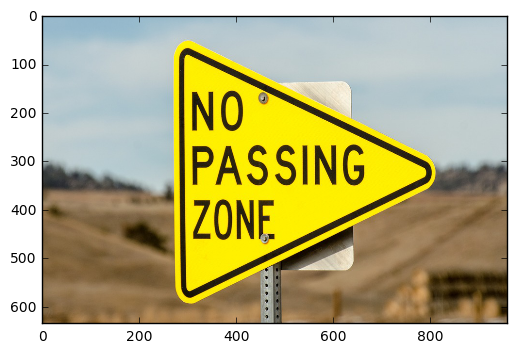

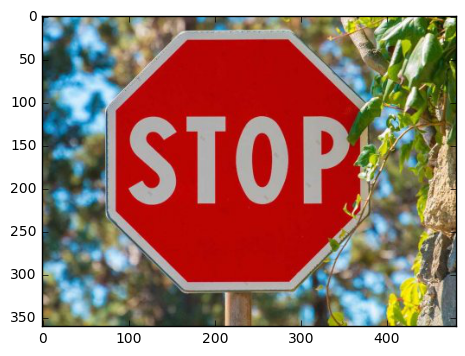

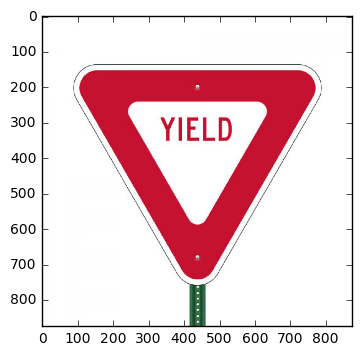

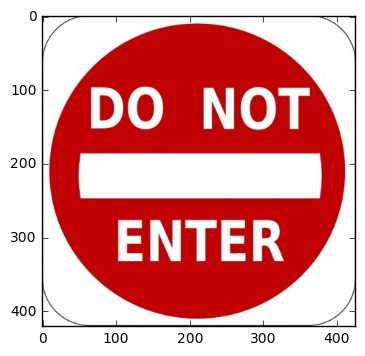

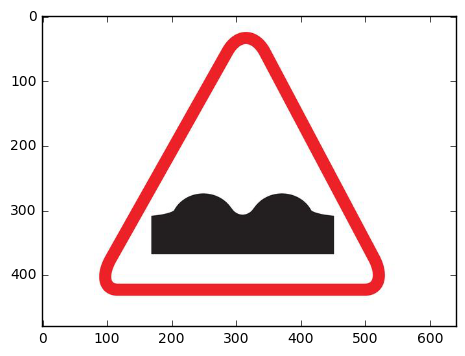

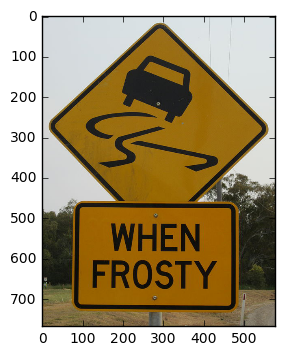

In [40]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

image_path = './practice_images/'
practice_images = [i for i in os.listdir(image_path)]
print(practice_images)
practice_list = []
for j in practice_images:
    plt.figure()
    j = cv2.imread(os.path.join(image_path, j))
    cv_rgb = cv2.cvtColor(j, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    #Resize to 32x32x3
    res = cv2.resize(cv_rgb,(32, 32), interpolation = cv2.INTER_AREA)
    #normalization
    norm_res = normalize_image(res)    
    practice_list.append(norm_res)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

The following qualities of the image might make the classification difficult:
    
    - Angle of the Traffic sign
    - Size of the Traffic sign (zoomed in or cropped out)
    - Multiple signs together (i.e School zone with speed limit)
    - Different camera angles
    - Traffic sign not in Testset


In [61]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
saver = tf.train.Saver()
practice_labels = np.array([9,14,13,17,22,23])
with tf.Session() as sess:
            
    # Restore variables from disk.
    saver.restore(sess, "model.ckpt")
    print("Model restored")
    
    classification = sess.run(tf.argmax(logits, 1), feed_dict={x: practice_list, keep_prob: 1.})
    
    for i in range(len(practice_images)):
        print(practice_images[i])
        print("Correct label:",practice_labels[i])
        print("Predicted label:",classification[i])
        if practice_labels[i] == classification[i]:
            print("Correct Prediction")
        else:
            print("Incorrect Prediction")
        print("      ")
    
   

Model restored
nopassingzone.jpg
Correct label: 9
Predicted label: 25
Incorrect Prediction
      
stopsign.jpg
Correct label: 14
Predicted label: 14
Correct Prediction
      
yield.jpg
Correct label: 13
Predicted label: 13
Correct Prediction
      
donotenter.jpg
Correct label: 17
Predicted label: 17
Correct Prediction
      
bumpy.jpg
Correct label: 22
Predicted label: 29
Incorrect Prediction
      
slippery.jpg
Correct label: 23
Predicted label: 14
Incorrect Prediction
      


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset?_


**Answer:**

- The model performed well on the images that were similar to the data set (i.e stop sign, speed limit etc). 

- The model didnt make a correct prediction on two signs in the same image. I tested it out with the end school zone sign followed by the 30 MPH sign in the same image. Not sure how to solve that problem.  

## Adding for Resubmission

- The model was able to predict 50% of the images correct. 3/6 images
- The model was able to predict Stop, Yield and No entry correct. 
- It wasnt able to predict signs that were not in the prediction set. American traffic signs that are different than German signs
- It wasnt able to predict two signs in one image. 

Model restored


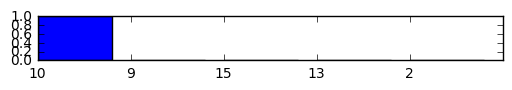

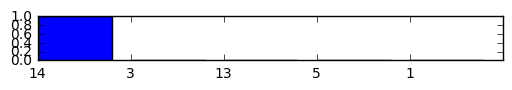

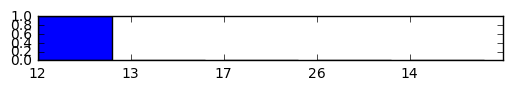

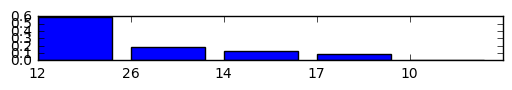

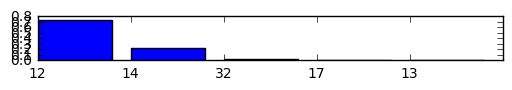

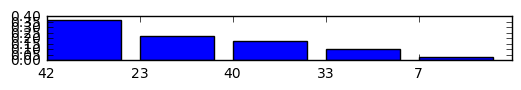

In [29]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
            
    # Restore variables from disk.
    saver.restore(sess, "model.ckpt")
    print("Model restored")
    
    softmax_prob = sess.run(tf.nn.softmax(logits), feed_dict={x:practice_list, keep_prob: 1.})
    top_predict,index = tf.nn.top_k(softmax_prob,k=5)
    top_predict = top_predict.eval()
    index = index.eval()
    i=0
    for j in range(len(top_predict)):
        i+=1
        plt.subplot(6,1,i)
        plt.bar(range(len(top_predict[j])),top_predict[j])
        plt.xticks(range(len(index[j])),index[j]) 
        plt.show()
    


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

- The images where the probabilities where not certain the correct predictions didnt appear in the top 5.
- In some cases even if the predicted sign is wrong, the model is certain it has the right prediction. 

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

- Normalized the image 
- Resized the images to 32x32X3 since the model was trained on images of that size. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.